In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
dataset_path = 'dataset'

paths = [f"{dataset_path}/s" + str(i) for i in range(1, 41)]
print(f"Paths: {paths}")  # This will print the paths
print(f"Length of paths: {len(paths)}")
cnt = 0
Data = np.zeros((400, 10304))
labels = np.zeros((400, 1))
for i in range(40):
    labels[i * 10 : (i + 1) * 10] = i + 1
for path in paths:
    files = os.listdir(path)
    for file in files:
        img = Image.open(path + "/" + file)
        np_img = np.array(img)
        np_img = np_img.flatten()
        Data[cnt] = np_img
        cnt += 1
        
print(len(paths))

Paths: ['dataset/s1', 'dataset/s2', 'dataset/s3', 'dataset/s4', 'dataset/s5', 'dataset/s6', 'dataset/s7', 'dataset/s8', 'dataset/s9', 'dataset/s10', 'dataset/s11', 'dataset/s12', 'dataset/s13', 'dataset/s14', 'dataset/s15', 'dataset/s16', 'dataset/s17', 'dataset/s18', 'dataset/s19', 'dataset/s20', 'dataset/s21', 'dataset/s22', 'dataset/s23', 'dataset/s24', 'dataset/s25', 'dataset/s26', 'dataset/s27', 'dataset/s28', 'dataset/s29', 'dataset/s30', 'dataset/s31', 'dataset/s32', 'dataset/s33', 'dataset/s34', 'dataset/s35', 'dataset/s36', 'dataset/s37', 'dataset/s38', 'dataset/s39', 'dataset/s40']
Length of paths: 40
40


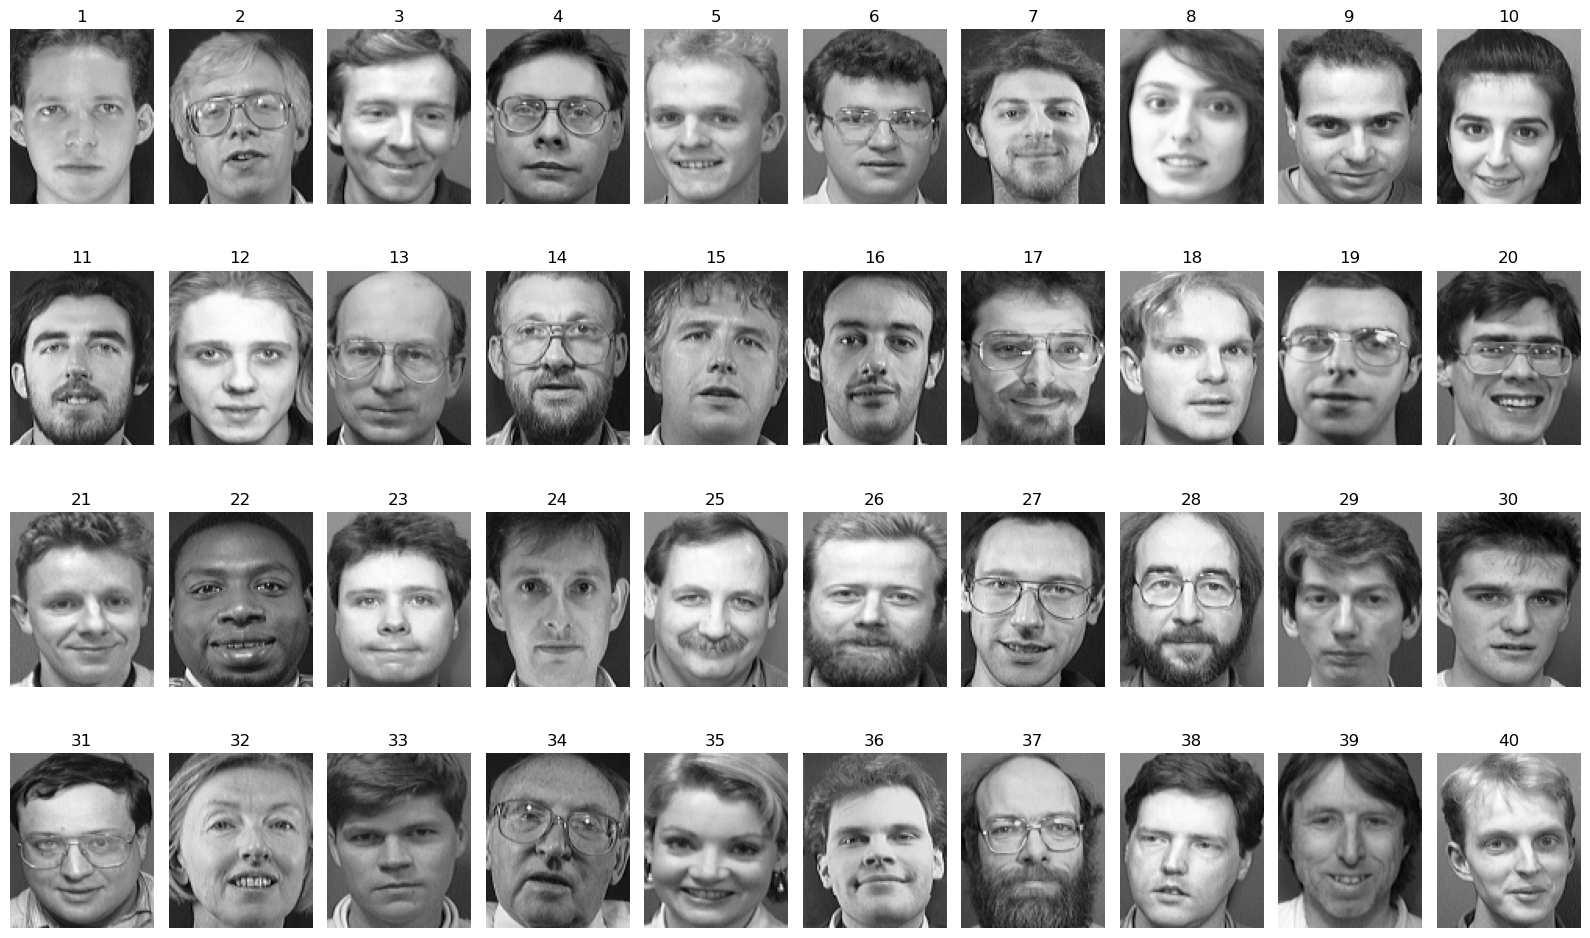

In [3]:
image_height = 112
image_width = 92

fig, axs = plt.subplots(4, 10, figsize=(16, 10))

# Flatten the array of axes
axs = axs.ravel()

for i in range(40):
    image_array = np.reshape(Data[(i) * 10], (image_height, image_width))
    axs[i].imshow(image_array, cmap="gray")
    axs[i].set_title(i + 1)
    axs[i].axis("off")

plt.tight_layout()
plt.show()

In [4]:
X_train = Data[0::2]
X_test = Data[1::2]
y_train = labels[0::2]
y_test = labels[1::2]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(200, 10304)
(200, 10304)
(200, 1)
(200, 1)


In [14]:
import os
import numpy as np
import cv2
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load your dataset (already in numpy arrays `X_train`, `X_test`, `y_train`, `y_test`)

from sklearn.preprocessing import StandardScaler



In [15]:
# Initialize the LBPH face recognizer
recognizer = cv2.face.LBPHFaceRecognizer_create()

# Convert images into suitable format for training LBPH
def get_features_using_LBPH(data):
    features = []
    for image in data:
        image = np.reshape(image, (112, 92))  # Reshape flattened image back to its original shape (assuming AT&T 112x92 images)
        image = np.uint8(image)  # Ensure data type is suitable for LBPH
        try:
            # Apply LBPH algorithm to extract features
            recognizer.train([image], np.array([0]))  # Temporarily train LBPH to get the feature
            hist = recognizer.getHistograms()[0]  # Get the LBPH histogram (feature vector)
            features.append(hist.flatten())  # Append the histogram as the feature vector
        except Exception as e:
            print(f"Error extracting features for one image: {e}")
    return np.array(features)

In [25]:
# Get the features using LBPH for both training and test sets
X_train_features = get_features_using_LBPH(X_train)
X_test_features = get_features_using_LBPH(X_test)

# Normalize the feature data
# scaler = StandardScaler()
# X_train_features = scaler.fit_transform(X_train_features)
# X_test_features = scaler.transform(X_test_features)

print(f"X_train_features shape: {X_train_features.shape}")
print(f"X_test_features shape: {X_test_features.shape}")

# Check for None in training and test data
if np.any([x is None for x in X_train_features]):
    print("X_train_features contains None values.")
if np.any([x is None for x in X_test_features]):
    print("X_test_features contains None values.")


X_train_features shape: (200, 16384)
X_test_features shape: (200, 16384)


In [26]:
import numpy as np

# Filter out None or invalid feature vectors
valid_indices = [i for i, x in enumerate(X_test_features) if x is not None]

# Filter X_test_features and y_test based on valid indices
X_test_valid = np.array([X_test_features[i] for i in valid_indices])
y_test_valid = np.array([y_test[i] for i in valid_indices])

In [27]:
# Step 3: Train KNN Classifier on the LBPH features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_features, y_train.ravel())

# knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# knn.fit(X_train_features, y_train.ravel())


KNeighborsClassifier()

In [28]:

# Step 4: Predict on the test set
y_pred = knn.predict(X_test_features)

In [29]:
# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro')

# Step 6: Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.77
Precision: 0.81
Recall: 0.77
F1 Score: 0.75


In [30]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with KNN
scores = cross_val_score(knn, X_train_features, y_train.ravel(), cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {scores.mean()}")


Cross-validation accuracy: 0.675
